
**In this notebook, i will be identifying the colors in an image. First I will use OpenCv for image processing and then machine learning algorithm- KMeans will be used to extract the colors.**

First let's import neccessary libraries.

In [1]:
from sklearn.cluster import KMeans
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
%matplotlib inline

**OpenCv**

In [2]:
img = cv2.imread('image_3.jpg') #Reading the image

In [3]:
print("The shape of the given image is ",img.shape)

The shape of the given image is  (6994, 5164, 3)


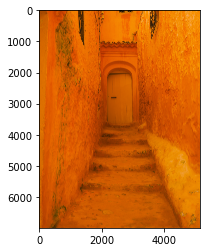

In [4]:
plt.imshow(img)

We can see that the colors are off this is because opencv reads the image in BGR by default. Hence we need to convert it into RGB

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

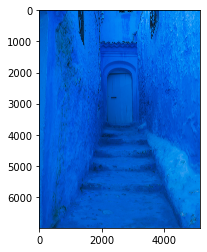

In [6]:
plt.imshow(img)

**Color Identification**

First let's write a function that will give us the hex values of the color that we will identify.

In [8]:
def RGB2HEX(color):
   return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [9]:
def get_image(image_path):
   #Enter your image path here
   img = cv2.imread(image_path)
   #Converting image from BGR to RGB:
   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   plt.imshow(img)
   return img

In [10]:
def get_colors(image, number_of_colors, show_chart):

  modified_image = cv2.resize(image, (600,400), interpolation = cv2.INTER_AREA)

  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  # We perform the above step as KMeans expect the imput to be two dimensional or flattend

  clf = KMeans(n_clusters=number_of_colors)
  labels = clf.fit_predict(modified_image)

  #print(labels)

  counts = Counter(labels)

  #print(counts)
  #Sort to ensure correct color percentage
  counts = dict(sorted(counts.items()))
  #print("counts",counts)

  center_colors = clf.cluster_centers_

  ordered_colors = [center_colors[i] for i in counts.keys()]
  #print("ordered colors-",ordered_colors)

  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]

  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  if (show_chart):
    plt.figure(figsize = (8,6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors


[array([  1.2636973 ,  89.10854219, 207.92751441]),
 array([  1.38412231,  69.42146753, 169.7711112 ]),
 array([  1.65633419, 115.90295008, 234.59786477]),
 array([ 3.72125047, 42.84852996, 86.04317082]),
 array([  1.36850372,  78.79396528, 190.74072747]),
 array([  6.20655722, 138.586699  , 239.99752822]),
 array([  1.21954485,  98.1964829 , 223.94073263]),
 array([  1.37011477,  57.88613007, 142.13734904])]

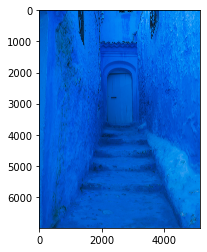

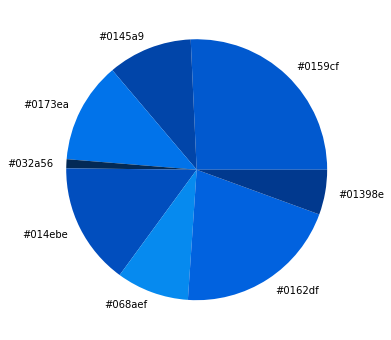

In [11]:
get_colors(get_image('image_3.jpg'), 8, True)

[array([206.60003507, 210.75369012, 206.05804811]),
 array([51.55082608, 80.8299165 , 50.87170012]),
 array([106.64439003, 135.92683278, 101.59426761]),
 array([234.29003534, 234.50824836, 233.3076426 ]),
 array([ 74.86252054, 109.27814297,  72.39220419]),
 array([42.73356557, 50.38938807, 41.15716058]),
 array([143.01348511, 160.46725044, 136.65858144]),
 array([177.92991734, 186.0156212 , 175.36487965])]

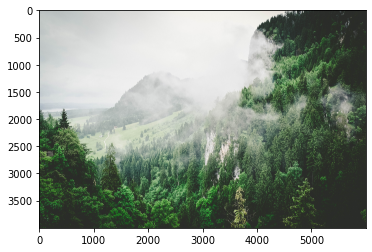

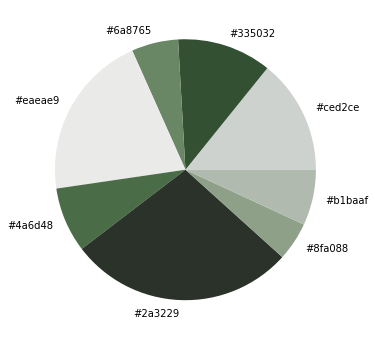

In [12]:
get_colors(get_image('image_2.jpg'), 8, True)